In [14]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,LocationScaleFlow, SoftmaxWeight
from models import EMDensityEstimator
from IPython.display import clear_output
from targets import Target, Uniform
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


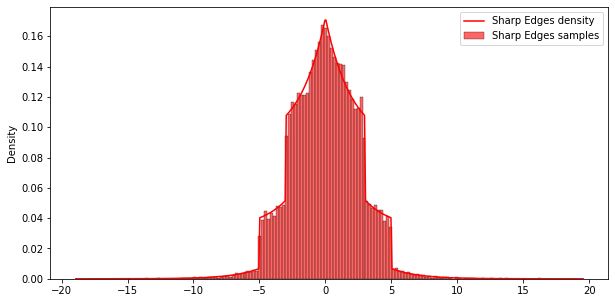

In [15]:
example = "Sharp Edges"
num_samples = 100000
target = Target(example, num_samples)
target.target_visual(num_samples = 30000)
p, target_log_density, target_samples = target.get_target()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:13<00:00, 51.77it/s, loss = 2.3191542625427246]


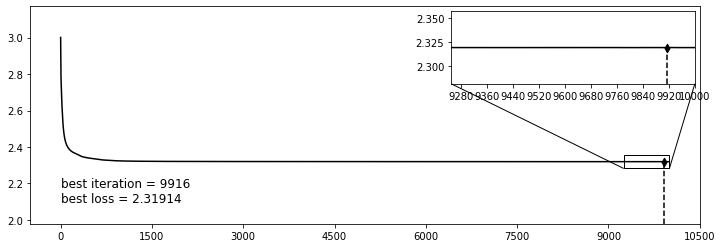

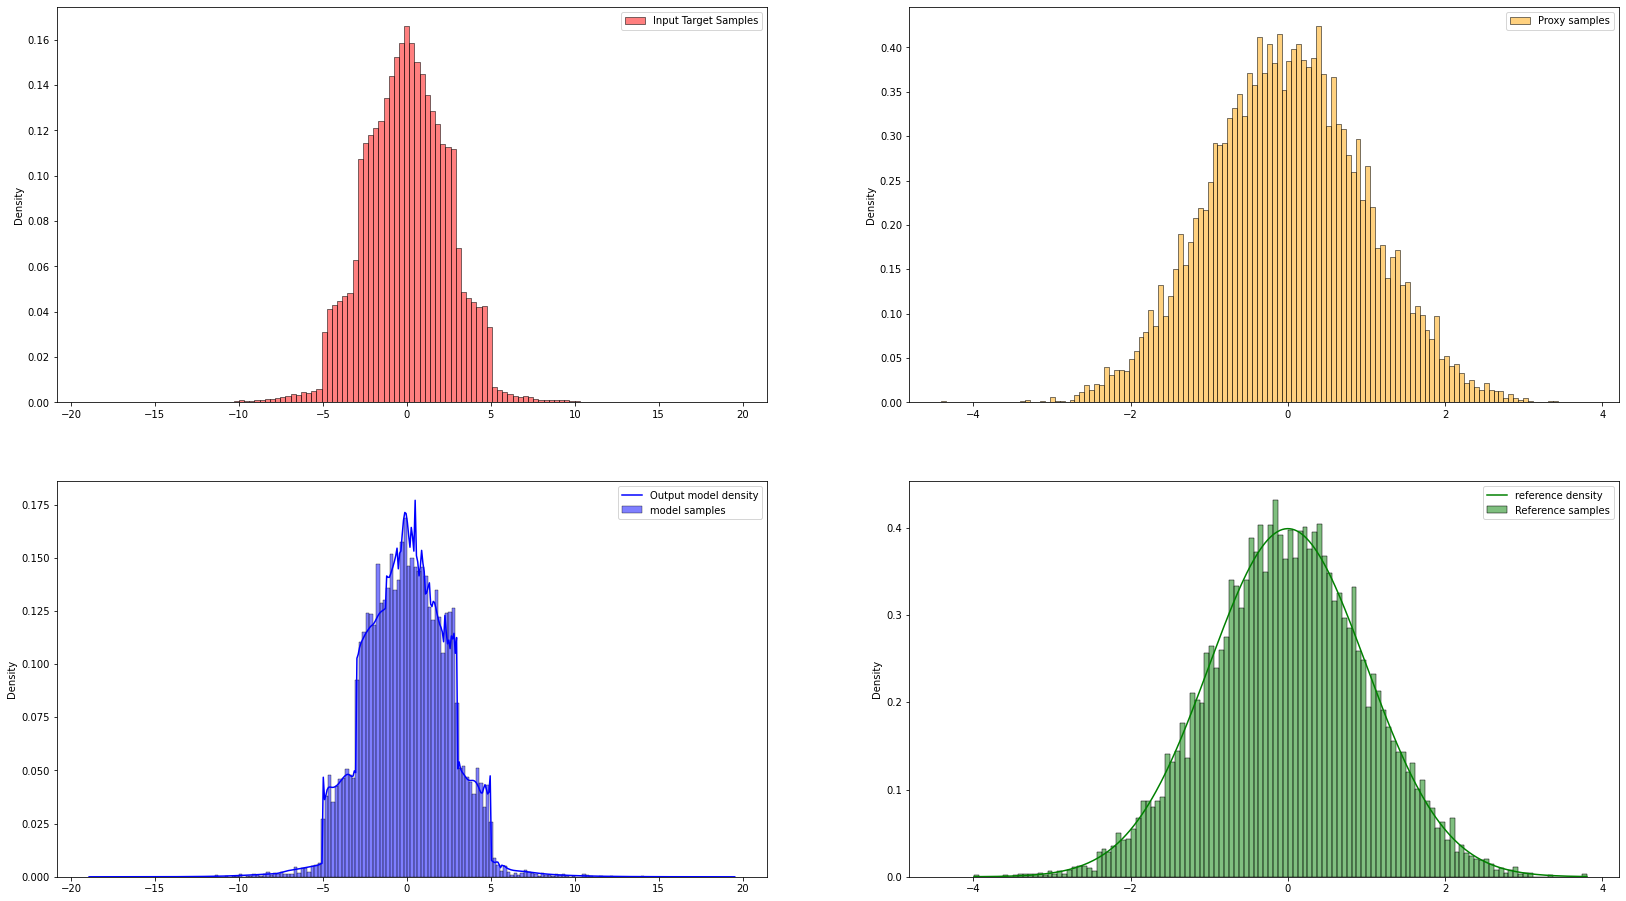

In [16]:
K=5
w = SoftmaxWeight(K, p, [20,20,20], mode = 'NN')
dif = DIFDensityEstimator(target_samples, K, initial_w= w)
dif.train(10000,visual = True)
dif.model_visual(num_samples = 10000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:07<00:00, 53.19it/s, loss = 2.318967819213867]


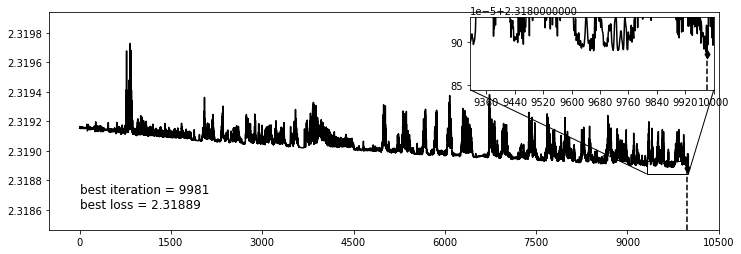

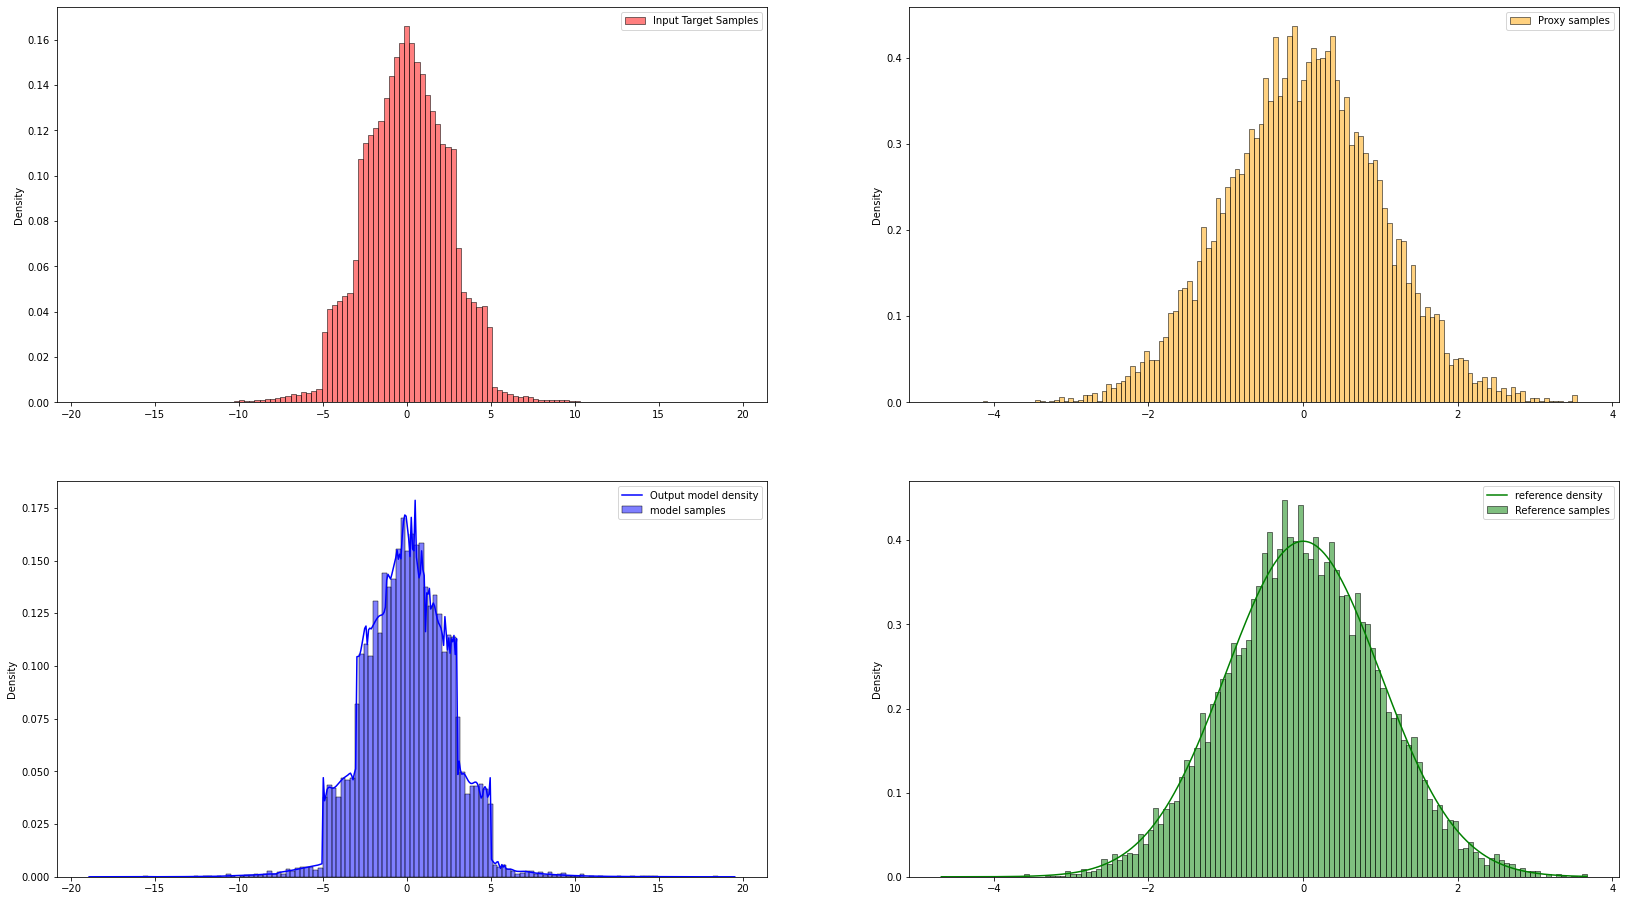

In [17]:
dif.train(10000,visual = True)
dif.model_visual(num_samples = 10000)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 69.44it/s, loss = 2.3318450450897217]


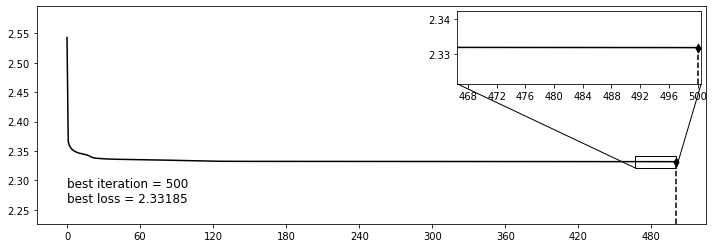

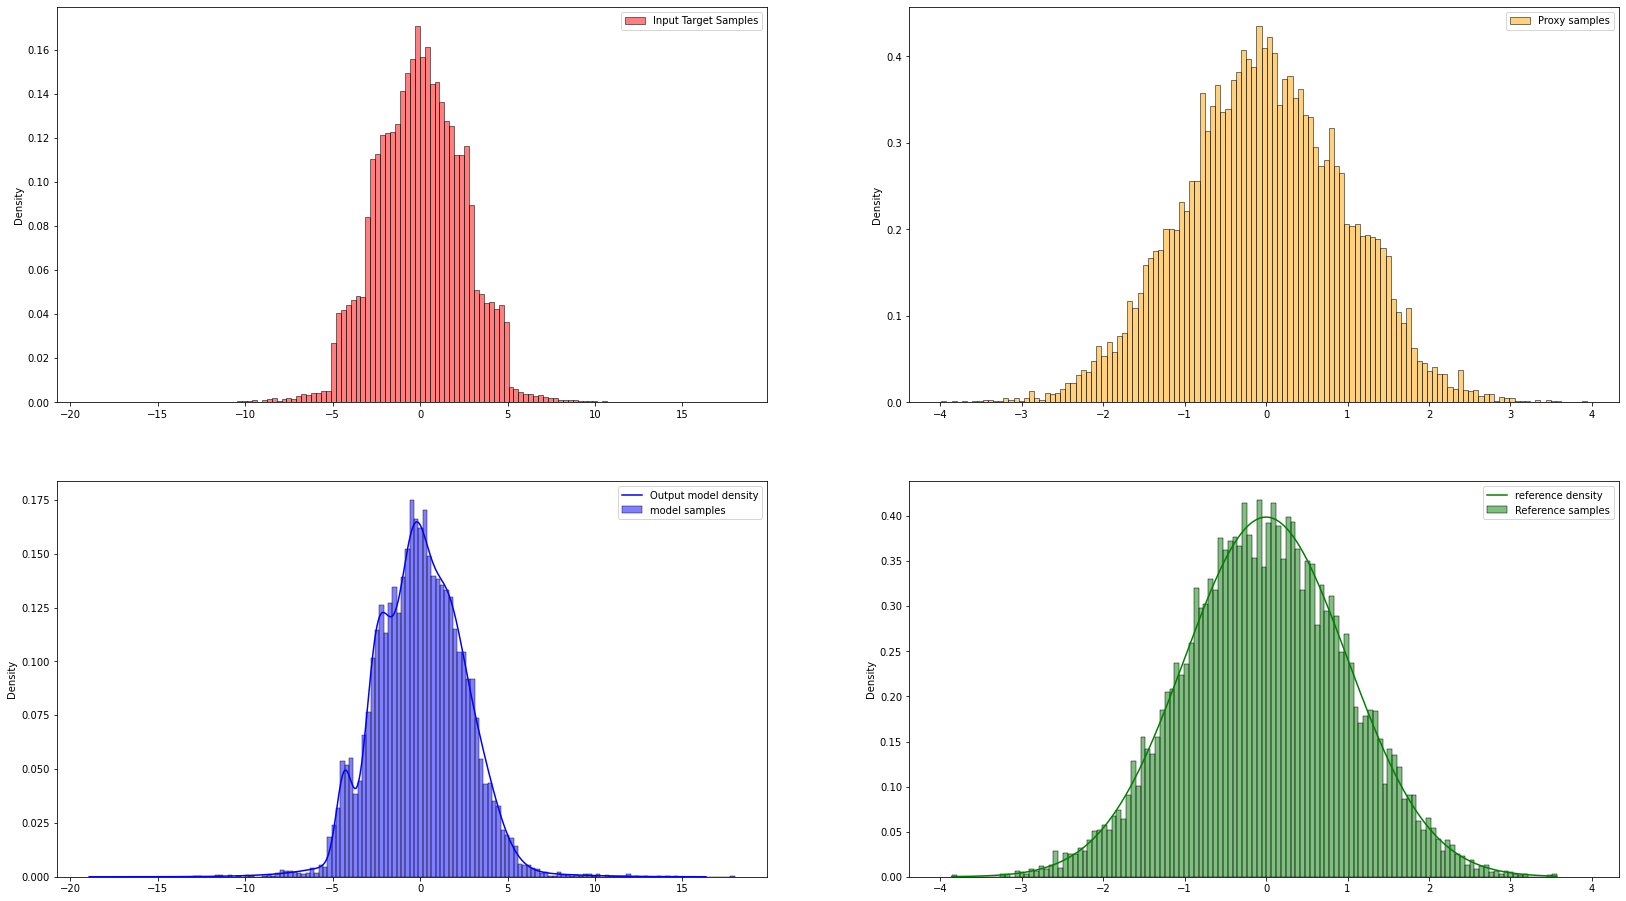

In [19]:
target_samples = target_samples[:50000]
EM = EMDensityEstimator(target_samples, 10)
EM.train(500, visual = True)
EM.model_visual(num_samples = 10000)

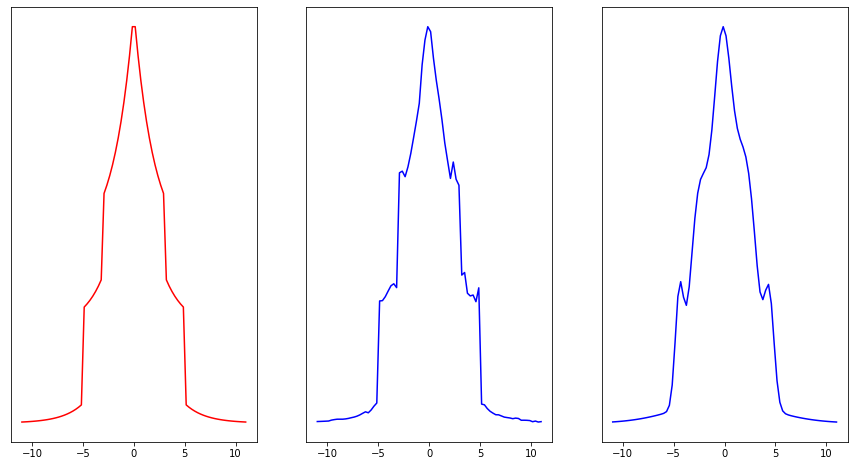

In [12]:
fig = plt.figure(figsize = (15,8))
tt= torch.linspace(-11,11,80).unsqueeze(-1)
ax1=fig.add_subplot(1,3,1)
ax1.set_yticks([])
ax1.plot(tt.squeeze(-1), torch.exp(target_log_density(tt)), color = 'red', label = 'Target')
ax2=fig.add_subplot(1,3,2)
ax2.set_yticks([])
ax2.plot(tt.squeeze(-1), torch.exp(dif.log_density(tt)).cpu().detach().numpy(), color = 'blue', label = 'DIF')
ax3=fig.add_subplot(1,3,3)
ax3.set_yticks([])
ax3.plot(tt.squeeze(-1), torch.exp(EM.log_density(tt)).cpu().detach().numpy(), color = 'blue', label = 'Gaussian Mixture')